<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Model/0_rf-PCA_Mutate-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -U pandas-profiling

In [1]:
import pandas as pd

In [ ]:
#import pandas_profiling

In [2]:
df = pd.read_csv('credit_cards_dataset.csv')

In [ ]:
df.head(3)

In [ ]:
#df.profile_report()

In [ ]:
#df.corr(method='spearman')

In [ ]:
df.columns

PCA for Pay_Score Bill_Amount Pay_Amount

In [3]:
from sklearn.decomposition import PCA

In [4]:
df_Pay_Score = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [5]:
df_Bill_Amount = df[[ 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [6]:
df_Pay_Amount = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [ ]:
#df_Pay_Amount.mean(axis=1)

In [ ]:
df_Pay_Score.head(3)

In [ ]:
df_Bill_Amount.head(3)

In [ ]:
df_Pay_Amount.head(3)

PCA instance 생성

In [7]:
trans = PCA(n_components=1)

In [8]:
X_Pay_Score = df_Pay_Score.values

In [9]:
X_Bill_Amount = df_Bill_Amount.values

In [10]:
X_Pay_Amount = df_Pay_Amount.values

In [11]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Score)

In [ ]:
X_dim.shape

In [13]:
df_X_dim_Pay_Score = pd.DataFrame(X_dim, columns=['Pay_AVR'])

In [14]:
# transform the data
X_dim = trans.fit_transform(X_Bill_Amount)

In [15]:
df_X_dim_Bill_Amount = pd.DataFrame(X_dim, columns=['Bill_AVR'])

In [16]:
# transform the data
X_dim = trans.fit_transform(X_Pay_Amount)

In [17]:
df_X_dim_Pay_Amount = pd.DataFrame(X_dim, columns=['P_AMT_AVR'])

Mutate Variable I : Credit Utilize

In [ ]:
df.columns

In [18]:
df['Bill_Amount_AVR'] = (df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'])/6

In [19]:
df['Credit_Util'] = (df['Bill_Amount_AVR'] / df['LIMIT_BAL'])*100

In [ ]:
df['Credit_Util'].describe()

In [ ]:
df_Pay_Amount.mean(axis=1)

In [ ]:
df_Bill_Amount.mean(axis=1)

In [36]:
df['Pay_Rate'] = (df_Pay_Amount.mean(axis=1) / df_Bill_Amount.mean(axis=1)).round(2)

In [ ]:
df['Pay_Rate']

In [41]:
df['Pay_Sum'] = df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

In [43]:
df['Pay_Sum'] = df_Pay_Amount.sum(axis=1)

In [ ]:
df['Pay_Sum']

In [48]:
df['Billed_Sum'] = df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']

In [46]:
df['Billed_Sum'] = df_Bill_Amount.sum(axis=1)

In [ ]:
#df.isin([0]).any().any()
#0 in df.values

In [55]:
 0 in df['Billed_Sum'].values

True

In [ ]:
df['Billed_Sum'].isin([0]).any()

In [60]:
(df['Billed_Sum'] == 0).sum()

870

In [ ]:
df['Billed_Sum']

In [50]:
df['Pay_Rate'] = ((df['Pay_Sum'] / df['Billed_Sum'])).round(2)

In [54]:
df['Pay_Rate'].describe()

count    29205.00
mean          inf
std           NaN
min       -546.93
25%          0.04
50%          0.09
75%          0.62
max           inf
Name: Pay_Rate, dtype: float64

목표변수 : default.payment.next.month  Input 데이터 셋: X

In [21]:
df = pd.concat([df, df_X_dim_Pay_Score, df_X_dim_Bill_Amount, df_X_dim_Pay_Amount ], axis=1)

In [22]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'Bill_Amount_AVR', 'Credit_Util',
       'Pay_AVR', 'Bill_AVR', 'P_AMT_AVR'],
      dtype='object')

In [ ]:
df.head(3)

In [36]:
X = df.drop(['ID','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Bill_Amount_AVR','Pay_Sum','Billed_Sum', 'default.payment.next.month'], axis =1).values

In [37]:
X.shape

(30000, 10)

In [38]:
y = df['default.payment.next.month'].values

Train Test Data Set 분리

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, shuffle=True)

RandomForest 모델 생성 및 학습

In [41]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1

In [ ]:
#rf = RandomForestClassifier(n_estimators=70, max_depth=5, min_samples_leaf=4, min_samples_split=3,random_state=1)

n_estimators=200, criterion='entropy', max_features='log2', max_depth=15

In [42]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features='log2', max_depth=15)

In [43]:
rf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_predict = rf.predict(X_test)

모델 성능 평가

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[6607  433]
 [1265  695]]


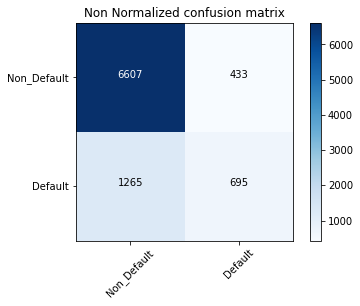

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non_Default','Default'], normalize=False,
                      title='Non Normalized confusion matrix')

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
print("Recall score:"+ str(recall_score(y_test, y_predict)))

Recall score:0.35459183673469385
